In [ ]:
#LESNET
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

!pip install imutils


In [ ]:
from imutils import paths
import matplotlib.pyplot as plt
import argparse
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split


In [ ]:
dataset = "/content/sample_data/dataset"


In [ ]:
args = {}
args["dataset"] = dataset


In [ ]:
import numpy as np
import cv2
iPaths = list(paths.list_images(args["dataset"]))  # image paths
data = []
labels = []
for iPath in iPaths:
    label = iPath.split(os.path.sep)[-2]  # split the image paths
    image = cv2.imread(iPath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert images into RGB Channel
    image = cv2.resize(image, (224, 224))  # Resizing the images
    data.append(image)
    labels.append(label)
data = np.array(data) / 255.0
labels = np.array(labels)


In [ ]:
import os

Data_Dir = "/content/sample_data/dataset"

if os.path.exists(Data_Dir):
    print(os.listdir(Data_Dir))
else:
    print("Data directory does not exist!")


['.ipynb_checkpoints', 'covid', 'normal']


In [ ]:
import os

Data_Dir = "/content/sample_data/dataset"
Cimages = os.listdir(os.path.join(Data_Dir, "covid"))
Nimages = os.listdir(os.path.join(Data_Dir, "normal"))

import matplotlib.pyplot as plt
import cv2
import skimage
from skimage.transform import resize
import numpy as np


Normal Chest X-ray Vs Covid-19 Chest X-ray


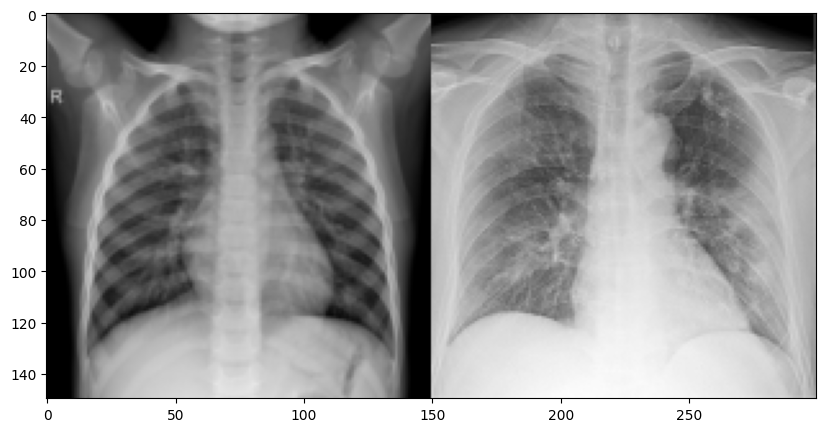

Normal Chest X-ray Vs Covid-19 Chest X-ray


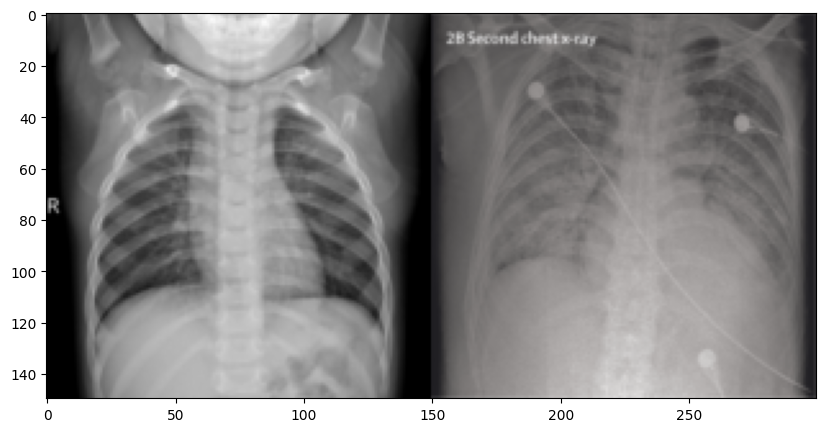

Normal Chest X-ray Vs Covid-19 Chest X-ray


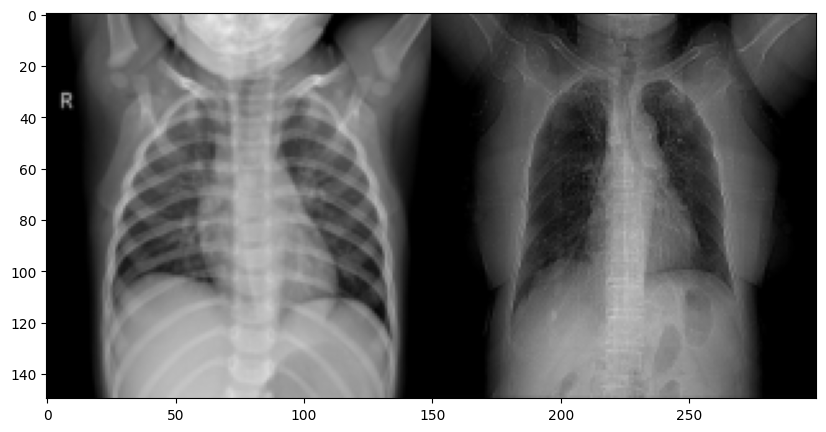

Normal Chest X-ray Vs Covid-19 Chest X-ray


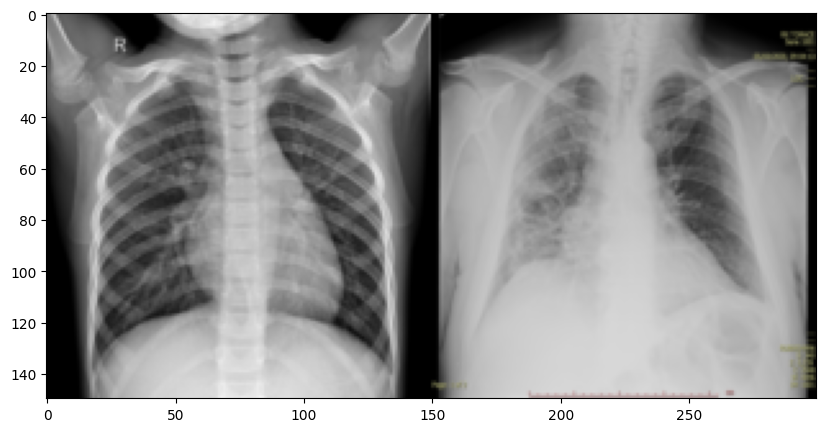

Normal Chest X-ray Vs Covid-19 Chest X-ray


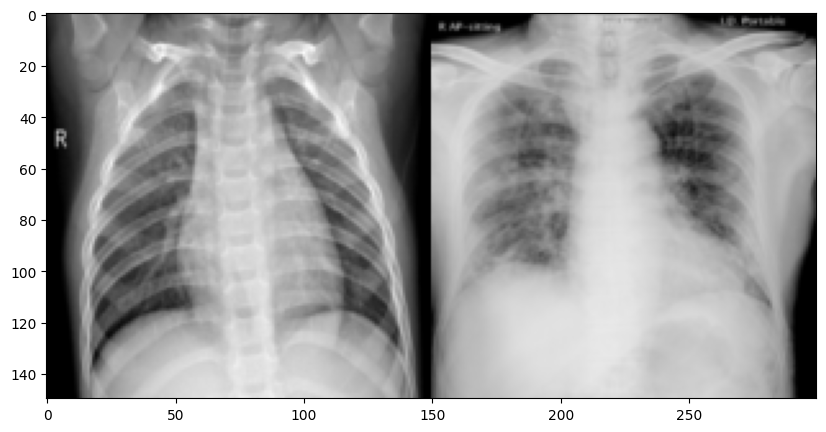

In [ ]:
def plotter(i):
    try:
        normal = cv2.imread(Data_Dir + "/normal/" + Nimages[i])
        if normal is None:
            raise ValueError("Failed to read normal image:", Nimages[i])
        normal = skimage.transform.resize(normal, (150, 150, 3))

        coronavirus = cv2.imread(Data_Dir + "/covid/" + Cimages[i])
        if coronavirus is None:
            raise ValueError("Failed to read coronavirus image:", Cimages[i])
        coronavirus = skimage.transform.resize(coronavirus, (150, 150, 3), mode='reflect')

        pair = np.concatenate((normal, coronavirus), axis=1)

        print("Normal Chest X-ray Vs Covid-19 Chest X-ray")
        plt.figure(figsize=(10, 5))
        plt.imshow(pair)
        plt.show()

    except Exception as e:
        print("Error:", str(e))

for i in range(0, 5):
    plotter(i)


In [ ]:
LB = LabelBinarizer()
labels = LB.fit_transform(labels)
labels = to_categorical(labels)
print(labels)
(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels,
                                                      test_size=0.20, stratify=labels, random_state=42)
trainAug = ImageDataGenerator(
    rotation_range=15,
    fill_mode="nearest")


[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(AveragePooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))



In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((75, 224, 224, 3), (19, 224, 224, 3), (75, 2), (19, 2))

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


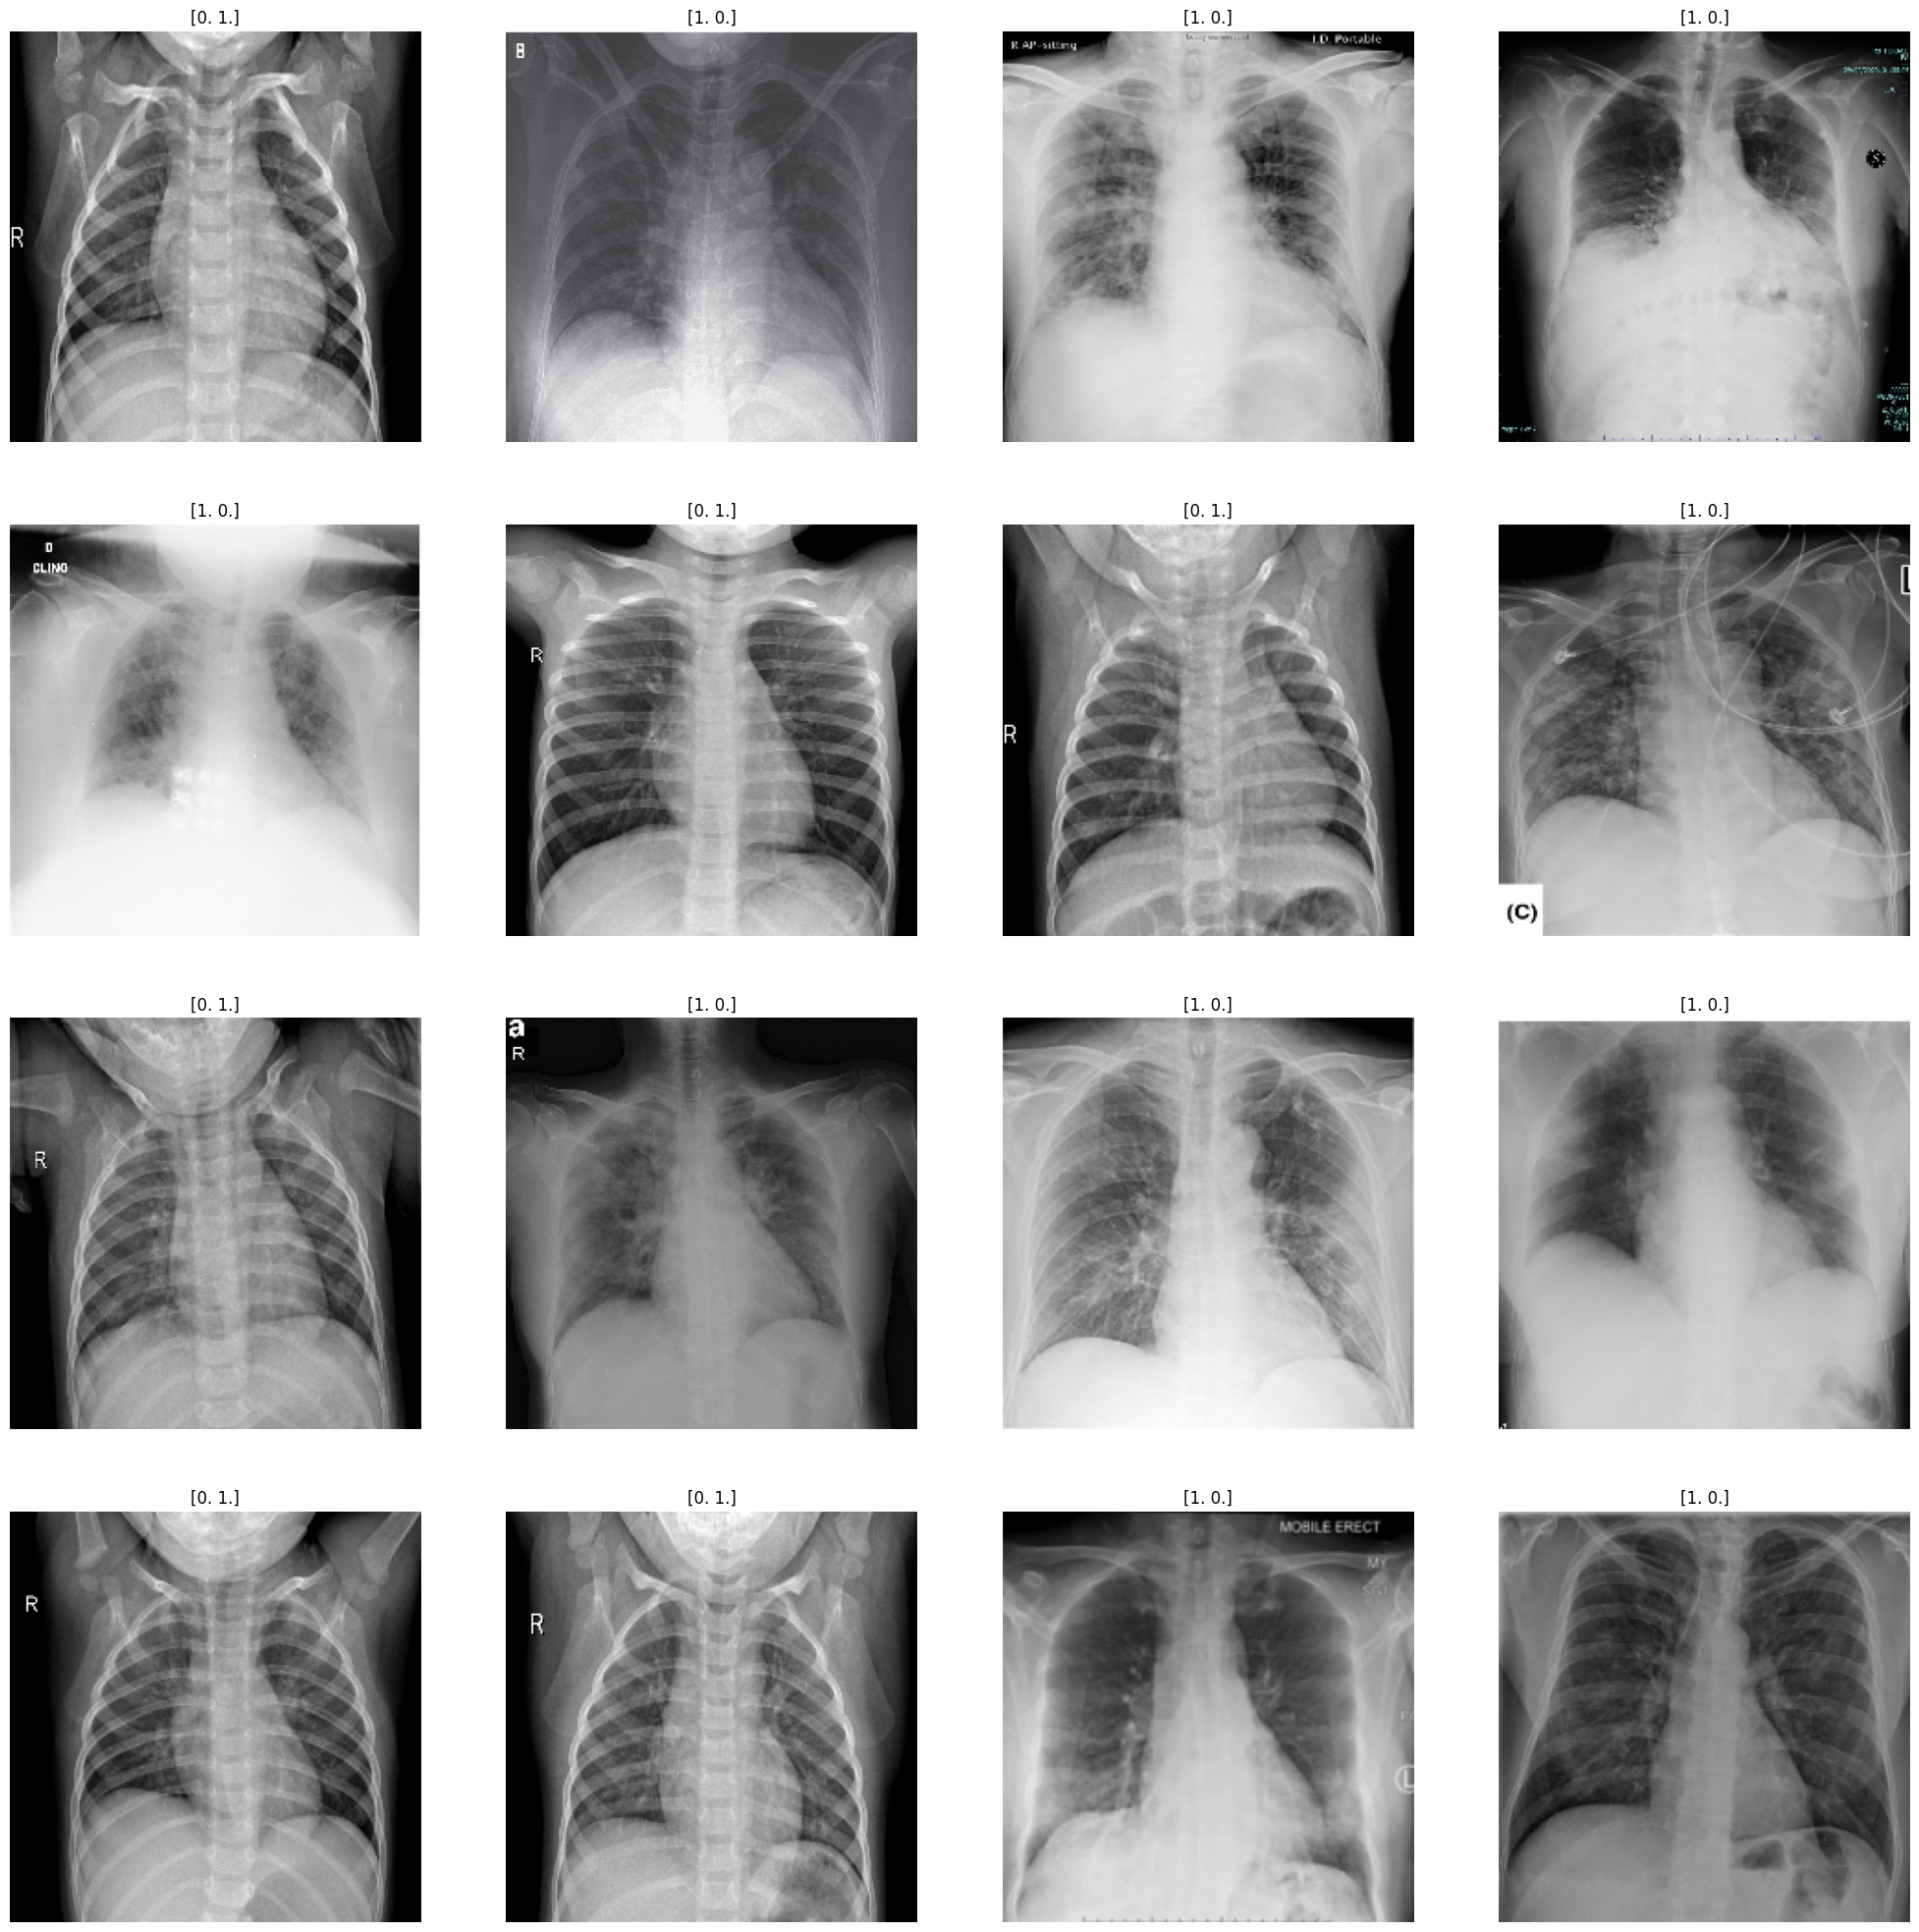

In [ ]:
W_grid = 4  # width
L_grid = 4  # length
fig, axes = plt.subplots(L_grid, W_grid, figsize=(25, 25))  # subplots
axes = axes.ravel()
n_training = len(X_train)
for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training)  # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(Y_train[index])
    axes[i].axis('off')


In [ ]:
plt.subplots_adjust(hspace=0.4)


<Figure size 640x480 with 0 Axes>

In [ ]:
INIT_LR = 1e-3
EPOCHS = 30
BS = 8


In [ ]:
opt = Adam(learning_rate=INIT_LR)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
print("Compiling Starts")

R = model.fit_generator(
    trainAug.flow(X_train, Y_train, batch_size=BS),
    steps_per_epoch=len(X_train) // BS,
    validation_data=(X_test, Y_test),
    validation_steps=len(X_test) // BS,
    epochs=EPOCHS
)


Compiling Starts
Epoch 1/30


<ipython-input-21-423ab1c6586f>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  R = model.fit_generator(


9/9 [==============================] - 14s 1s/step - loss: 0.0647 - accuracy: 0.9722 - val_loss: 0.6469 - val_accuracy: 0.8947
Epoch 2/30
9/9 [==============================] - 17s 2s/step - loss: 0.2161 - accuracy: 0.9552 - val_loss: 0.7469 - val_accuracy: 0.8947
Epoch 3/30
9/9 [==============================] - 13s 1s/step - loss: 0.1725 - accuracy: 0.9701 - val_loss: 0.3252 - val_accuracy: 0.9474
Epoch 4/30
9/9 [==============================] - 7s 738ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0727 - val_accuracy: 1.0000
Epoch 5/30
9/9 [==============================] - 7s 754ms/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 0.0329 - val_accuracy: 1.0000
Epoch 6/30
9/9 [==============================] - 8s 933ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0536 - val_accuracy: 0.9474
Epoch 7/30
9/9 [==============================] - 7s 720ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0550 - val_accuracy: 0.9474
Epoch 8/30
9/9 [=====================

3/3 [==============================] - 1s 120ms/step


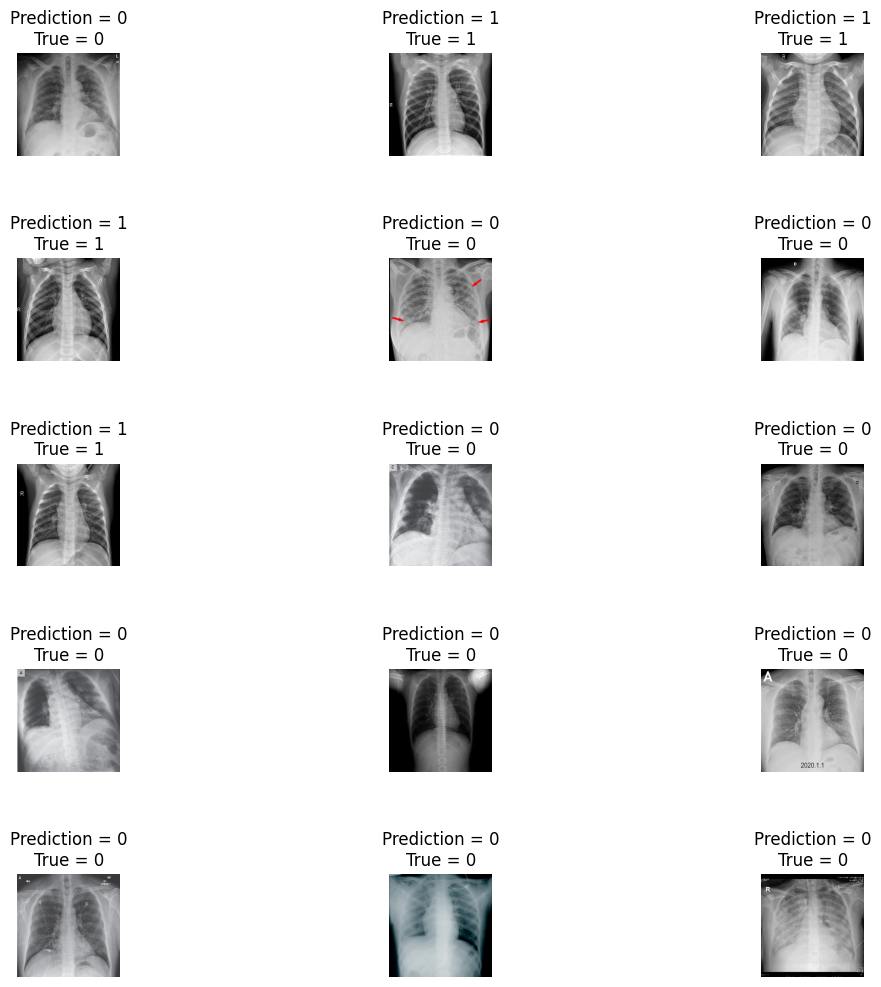

In [ ]:
L = 5
W = 3
fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()
y_pred = model.predict(X_test, batch_size=BS)
for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\nTrue = {}'.format(y_pred.argmax(axis=1)[i],
                                                          Y_test.argmax(axis=1)[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1, hspace=1)


In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test, batch_size=BS)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(Y_test.argmax(axis=1), y_pred, target_names=LB.classes_))


3/3 [==============================] - 0s 127ms/step
              precision    recall  f1-score   support

       covid       1.00      1.00      1.00        14
      normal       1.00      1.00      1.00         5

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test, batch_size=BS)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(Y_test.argmax(axis=1), y_pred, target_names=LB.classes_))

from sklearn.metrics import accuracy_score
accuracy_score(Y_test.argmax(axis=1), y_pred)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test.argmax(axis=1), y_pred)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))


3/3 [==============================] - 1s 262ms/step
              precision    recall  f1-score   support

       covid       1.00      1.00      1.00        14
      normal       1.00      1.00      1.00         5

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

[[14  0]
 [ 0  5]]
acc: 1.0000
sensitivity: 1.0000
specificity: 1.0000


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test.argmax(axis=1), y_pred)


1.0

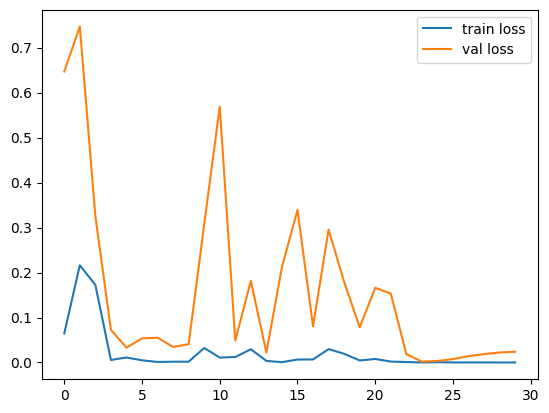

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(R.history['loss'], label='train loss')
plt.plot(R.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


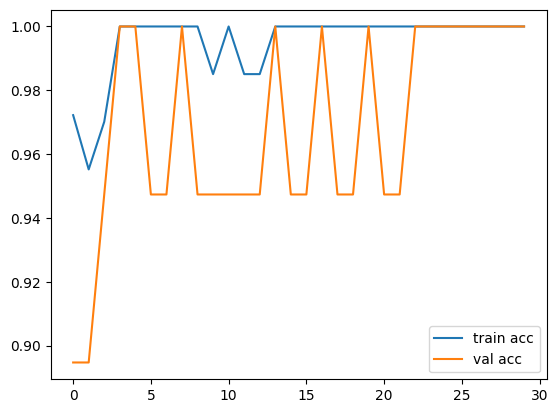

In [ ]:
# plot the accuracy
plt.plot(R.history['accuracy'], label='train acc')
plt.plot(R.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


In [ ]:
model.save('Covid_model.h5')

1/1 [==============================] - 0s 97ms/step
Prediction: Corona


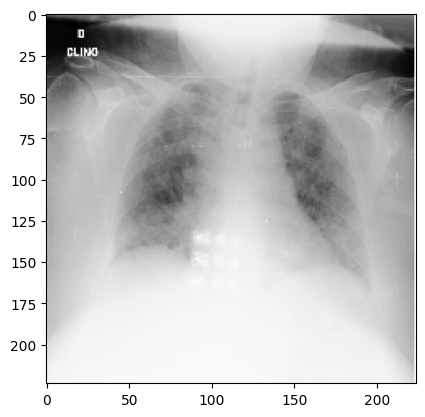

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

model = tf.keras.models.load_model('Covid_model.h5')
from keras.applications.vgg16 import preprocess_input

img = tf.keras.preprocessing.image.load_img(
    '/content/sample_data/dataset/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg',
    target_size=(224, 224))
imgplot = plt.imshow(img)

x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)

classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred == [1]:
    print('Prediction: Corona')
else:
    print('Prediction: Normal')



1/1 [==============================] - 0s 117ms/step
Prediction: Normal


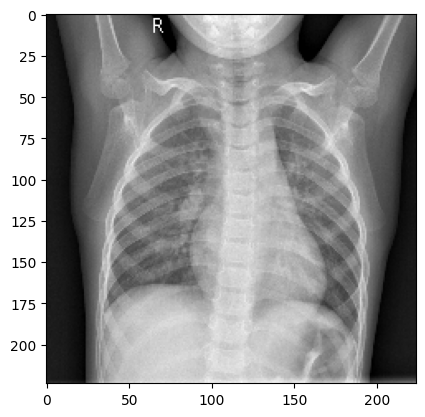

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

model = tf.keras.models.load_model('Covid_model.h5')
from keras.applications.vgg16 import preprocess_input

img = tf.keras.preprocessing.image.load_img(
    '/content/sample_data/dataset/normal/IM-0115-0001.jpeg',
    target_size=(224, 224))
imgplot = plt.imshow(img)

x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)

classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred == [1]]:
    print('Prediction: Corona')
else:
    print('Prediction: Normal')